In [1]:
#Original author Austin Lawson
#modifications ic

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline
from scipy.spatial.distance import pdist,cdist
from scipy.stats import gaussian_kde
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
from collections import defaultdict
from shapely.geometry import Polygon,Point
from operator import itemgetter
import gudhi
import scipy
from scipy import optimize
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
import patsy
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from statsmodels.distributions.empirical_distribution import ECDF
    
import pandas as pd

In [2]:
D_St_low = np.load("PDchains/LowNoiseStrauss.npy",allow_pickle=True).item()
D_St_med = np.load("PDchains/MedNoiseStrauss.npy",allow_pickle=True).item()
D_St_hig = np.load("PDchains/HigNoiseStrauss.npy",allow_pickle=True).item()

D_PC_low = np.load("PDchains/LowNoisePCPI.npy",allow_pickle=True).item()
D_PC_med = np.load("PDchains/MedNoisePCPI.npy",allow_pickle=True).item()
D_PC_hig = np.load("PDchains/HigNoisePCPI.npy",allow_pickle=True).item()

D_SC_low = np.load("PDchains/LowNoiseSC.npy",allow_pickle=True).item()
D_SC_med = np.load("PDchains/MedNoiseSC.npy",allow_pickle=True).item()
D_SC_hig = np.load("PDchains/HigNoiseSC.npy",allow_pickle=True).item()

#D_CT_low = np.load("PDchains/LowNoiseControl.npy",allow_pickle=True).item()
#D_CT_med = np.load("PDchains/MedNoiseControl.npy",allow_pickle=True).item()
#D_CT_hig = np.load("PDchains/HigNoiseControl.npy",allow_pickle=True).item()

#ground_truth = np.load("PDgroundtruth.npy", allow_pickle=True)
pd1_low = np.load("PDoriginal/PDlownoise.npy",allow_pickle=True)
pd1_med = np.load("PDoriginal/PDmednoise.npy",allow_pickle=True)
pd1_hig = np.load("PDoriginal/PDhignoise.npy",allow_pickle=True)


In [3]:
#persistence_order = np.sort(ground_truth[:,1])[::-1]
order_low = np.sort(pd1_low[:,1])[::-1]
order_med = np.sort(pd1_med[:,1])[::-1]
order_hig = np.sort(pd1_hig[:,1])[::-1]
ite = 100000

In [4]:
def RunAvg(D_comp_loglin,ite):
    """
    etracts the Nth highest point's persistense value for N=1,2,3,4
    @input: D_comp_loglin- a 'ite' sized dict consisting of 2xk numpy array
    @itput: ite- value
    @output: classloglinX a 1x'ite' array consiting of the Xth most persisent point in D_comp_loglin
    """
    classloglin1 = np.array([np.max(D_comp_loglin[i][:,1]) for i in range(ite)])
    #to build classloglin2, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin2 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin2[i] = pers_tmp[1] #grab the second highest value (or nan)
    classloglin2 = classloglin2[classloglin2==classloglin2] #omit the nan values
    #to build classloglin3, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin3 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin3[i] = pers_tmp[2] #grab the third highest value (or nan)
    classloglin3 = classloglin3[classloglin3==classloglin3] #omit the nan values
    #to build classloglin4, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin4 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin4[i] = pers_tmp[3] #grab the fourth highest value (or nan)
    classloglin4 = classloglin4[classloglin4==classloglin4] #omit the nan values
    return classloglin1, classloglin2, classloglin3, classloglin4

In [5]:
o1_PC_low, o2_PC_low, o3_PC_low, o4_PC_low = RunAvg(D_PC_low,ite) #PCPIlow
o1_PC_med, o2_PC_med, o3_PC_med, o4_PC_med = RunAvg(D_PC_med,ite) #PCPImedium
o1_PC_hig, o2_PC_hig, o3_PC_hig, o4_PC_hig = RunAvg(D_PC_hig,ite) #PCPIhigh

o1_St_low, o2_St_low, o3_St_low, o4_St_low = RunAvg(D_St_low,ite) #Strausslow
o1_St_med, o2_St_med, o3_St_med, o4_St_med = RunAvg(D_St_med,ite) #Straussmedium
o1_St_hig, o2_St_hig, o3_St_hig, o4_St_hig = RunAvg(D_St_hig,ite) #Strausshigh

o1_SC_low, o2_SC_low, o3_SC_low, o4_SC_low = RunAvg(D_SC_low,ite) #Softcorelow
o1_SC_med, o2_SC_med, o3_SC_med, o4_SC_med = RunAvg(D_SC_med,ite) #Softcoremedium
o1_SC_hig, o2_SC_hig, o3_SC_hig, o4_SC_hig = RunAvg(D_SC_hig,ite) #Softcorehigh

#o1_CT_low, o2_CT_low, o3_CT_low, o4_CT_low = RunAvg(D_CT_low,ite) #Controllow
#o1_CT_med, o2_CT_med, o3_CT_med, o4_CT_med = RunAvg(D_CT_med,ite) #Controlmedium
#o1_CT_hig, o2_CT_hig, o3_CT_hig, o4_CT_hig = RunAvg(D_CT_hig,ite) #Controlhigh

In [6]:
print('o(1) Voro low noise')

cdiff = np.abs(o1_St_low - order_low[0])
s1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) St', s1l[-1])

cdiff = np.abs(o1_PC_low - order_low[0])
p1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) PC', p1l[-1])

cdiff = np.abs(o1_SC_low - order_low[0])
c1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) SC', c1l[-1])


o(1) Voro low noise
low o(1) St 0.26057007670740995
low o(1) PC 0.31308101791759513
low o(1) SC 0.24087444284716725


In [7]:
print('o(2) Voro low noise')

cdiff = np.abs(o2_St_low - order_low[1])
s2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) St', s2l[-1])

cdiff = np.abs(o2_PC_low - order_low[1])
p2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) PC', p2l[-1])

cdiff = np.abs(o2_SC_low - order_low[1])
c2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) SC', c2l[-1])


o(2) Voro low noise
low o(2) St 0.34740743287154086
low o(2) PC 0.40580158280123596
low o(2) SC 0.3368022930440519


In [8]:
print('o(3) Voro low noise')

cdiff = np.abs(o3_St_low - order_low[2])
s3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) St', s3l[-1])

cdiff = np.abs(o3_PC_low - order_low[2])
p3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) PC', p3l[-1])

cdiff = np.abs(o3_SC_low - order_low[2])
c3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) SC', c3l[-1])


o(3) Voro low noise
low o(3) St 0.34922779731120124
low o(3) PC 0.4302064641639544
low o(3) SC 0.35487464643426575


In [9]:
print('o(4) Voro low noise')

cdiff = np.abs(o4_St_low - order_low[3])
s4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) St', s4l[-1])

cdiff = np.abs(o4_PC_low - order_low[3])
p4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) PC', p4l[-1])

cdiff = np.abs(o4_SC_low - order_low[3])
c4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) SC', c4l[-1])


o(4) Voro low noise
low o(4) St 0.3807998164696804
low o(4) PC 0.43456895975338006
low o(4) SC 0.46212390627785893


In [10]:
print('o(1) Voro med noise')

cdiff = np.abs(o1_St_med - order_med[0])
s1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) St', s1m[-1])

cdiff = np.abs(o1_PC_med - order_med[0])
p1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) PC', p1m[-1])

cdiff = np.abs(o1_SC_med - order_med[0])
c1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) SC', c1m[-1])


o(1) Voro med noise
med o(1) St 0.10419036645732127
med o(1) PC 0.18536936049986494
med o(1) SC 0.1231998204293031


In [11]:
print('o(2) Voro med noise')

cdiff = np.abs(o2_St_med - order_med[1])
s2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s2m[-1])

cdiff = np.abs(o2_PC_med - order_med[1])
p2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p2m[-1])

cdiff = np.abs(o2_SC_med - order_med[1])
c2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c2m[-1])


o(2) Voro med noise
St 0.41690291957639936
PC 0.4028920474298987
SC 0.36768324374712713


In [12]:
print('o(3) Voro med noise')

cdiff = np.abs(o3_St_med - order_med[2])
s3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s3m[-1])

cdiff = np.abs(o3_PC_med - order_med[2])
p3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p3m[-1])

cdiff = np.abs(o3_SC_med - order_med[2])
c3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c3m[-1])


o(3) Voro med noise
St 0.48986421436828614
PC 0.4507778670068323
SC 0.40470964303420126


In [13]:
print('o(4) Voro med noise')

cdiff = np.abs(o4_St_med - order_med[3])
s4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s4m[-1])

cdiff = np.abs(o4_PC_med - order_med[3])
p4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p4m[-1])

cdiff = np.abs(o4_SC_med - order_med[3])
c4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c4m[-1])


o(4) Voro med noise
St 0.8955354063345716
PC 0.5012686974554463
SC 0.7429963770133015


In [14]:
print('o(1) Voro hig noise')

cdiff = np.abs(o1_St_hig - order_hig[0])
s1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s1h[-1])

cdiff = np.abs(o1_PC_hig - order_hig[0])
p1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p1h[-1])

cdiff = np.abs(o1_SC_hig - order_hig[0])
c1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c1h[-1])


o(1) Voro hig noise
St 0.03163736157540202
PC 0.03473883059004225
SC 0.03220088547128546


In [15]:
print('o(2) Voro hig noise')

cdiff = np.abs(o2_St_hig - order_hig[1])
s2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s2h[-1])

cdiff = np.abs(o2_PC_hig - order_hig[1])
p2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p2h[-1])

cdiff = np.abs(o2_SC_hig - order_hig[1])
c2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c2h[-1])


o(2) Voro hig noise
St 0.07671012956451134
PC 0.054086942082295475
SC 0.08222989184796917


In [16]:
print('o(3) Voro hig noise')

cdiff = np.abs(o3_St_hig - order_hig[2])
s3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s3h[-1])

cdiff = np.abs(o3_PC_hig - order_hig[2])
p3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p3h[-1])

cdiff = np.abs(o3_SC_hig - order_hig[2])
c3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c3h[-1])


o(3) Voro hig noise
St 0.3578054094271447
PC 0.29604496094529775
SC 0.36609427300804603


In [17]:
print('o(4) Voro hig noise')

cdiff = np.abs(o4_St_hig - order_hig[3])
s4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s4h[-1])

cdiff = np.abs(o4_PC_hig - order_hig[3])
p4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p4h[-1])

cdiff = np.abs(o4_SC_hig - order_hig[3])
c4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c4h[-1])
#plt.plot(k,label="SoftCore")


o(4) Voro hig noise
St 0.4871651311936485
PC 0.4101157433929453
SC 0.4966650749848037


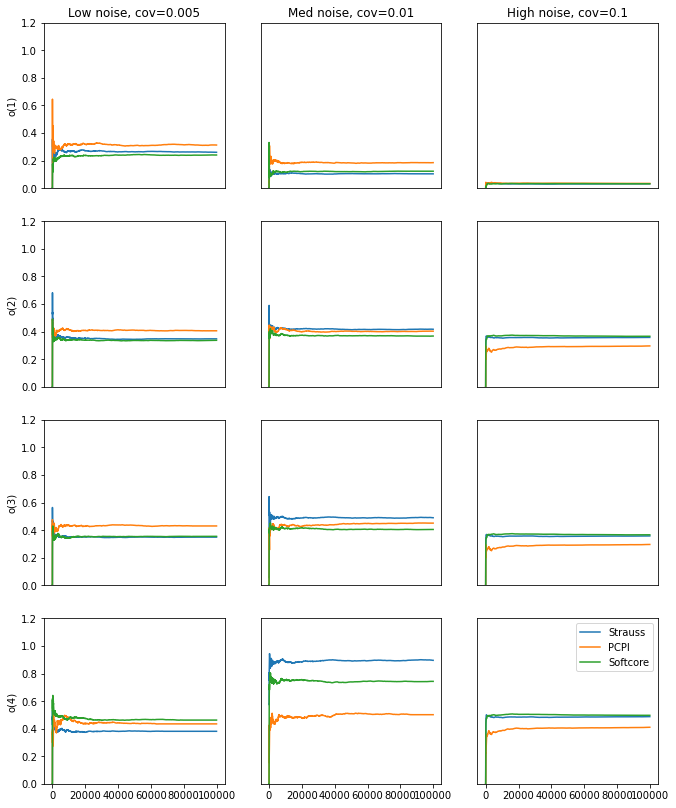

In [18]:
fig, ax = plt.subplots(4,3)

yaxis=np.array([0,1.2])

fig.set_size_inches(11, 14)
ax[0,0].plot(s1l)
ax[0,0].plot(p1l)
ax[0,0].plot(c1l)
ax[0,0].set_ylim(yaxis)
ax[0,0].xaxis.set_visible(False)

ax[0,1].plot(s1m)
ax[0,1].plot(p1m)
ax[0,1].plot(c1m)
ax[0,1].set_ylim(yaxis)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)

ax[0,2].plot(s1h)
ax[0,2].plot(p1h)
ax[0,2].plot(c1h)
ax[0,2].set_ylim(yaxis)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)


ax[1,0].plot(s2l)
ax[1,0].plot(p2l)
ax[1,0].plot(c2l)
ax[1,0].set_ylim(yaxis)
ax[1,0].xaxis.set_visible(False)

ax[1,1].plot(s2m)
ax[1,1].plot(p2m)
ax[1,1].plot(c2m)
ax[1,1].set_ylim(yaxis)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

ax[1,2].plot(s3h)
ax[1,2].plot(p3h)
ax[1,2].plot(c3h)
ax[1,2].set_ylim(yaxis)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)


ax[2,0].plot(s3l)
ax[2,0].plot(p3l)
ax[2,0].plot(c3l)
ax[2,0].set_ylim(yaxis)
ax[2,0].xaxis.set_visible(False)

ax[2,1].plot(s3m)
ax[2,1].plot(p3m)
ax[2,1].plot(c3m)
ax[2,1].set_ylim(yaxis)
ax[2,1].xaxis.set_visible(False)
ax[2,1].yaxis.set_visible(False)

ax[2,2].plot(s3h)
ax[2,2].plot(p3h)
ax[2,2].plot(c3h)
ax[2,2].set_ylim(yaxis)
ax[2,2].xaxis.set_visible(False)
ax[2,2].yaxis.set_visible(False)


ax[3,0].plot(s4l)
ax[3,0].plot(p4l)
ax[3,0].plot(c4l)
ax[3,0].set_ylim(yaxis)

ax[3,1].plot(s4m)
ax[3,1].plot(p4m)
ax[3,1].plot(c4m)
ax[3,1].set_ylim(yaxis)
ax[3,1].yaxis.set_visible(False)

ax[3,2].plot(s4h,label='Strauss')
ax[3,2].plot(p4h,label='PCPI')
ax[3,2].plot(c4h,label='Softcore')
ax[3,2].set_ylim(yaxis)
ax[3,2].legend(bbox_to_anchor=(1, 1))
ax[3,2].yaxis.set_visible(False)

ax[0,0].title.set_text("Low noise, cov=0.005")
ax[0,1].title.set_text("Med noise, cov=0.01")
ax[0,2].title.set_text("High noise, cov=0.1")

ax[0,0].set_ylabel("o(1)")
ax[1,0].set_ylabel("o(2)")
ax[2,0].set_ylabel("o(3)")
ax[3,0].set_ylabel("o(4)")

plt.show()
fig.savefig("images/VoroRA.jpg",bbox_inches = "tight")

0.33990498414643827
0.3368022930440519


(0.3, 0.55)

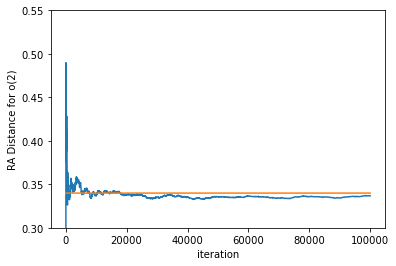

In [19]:
#generating RA figure for demonstration purposes in thesis
#(Voro, SC)--o(2)
print(c2l[15000])
print(c2l[-1])

L=c2l[15000]*np.ones(100000)

plt.plot(c2l)
plt.plot(L)
plt.xlabel('iteration')
plt.ylabel('RA Distance for o(2)')
plt.ylim([.3,.55])

## Loading snapshot results from RunningAvg_Gauss.ipynb

In [20]:
gc1l = np.load("RA_new/gc1l.npy",allow_pickle=True)
gp1l = np.load("RA_new/gp1l.npy",allow_pickle=True)
gs1l = np.load("RA_new/gs1l.npy",allow_pickle=True)

gc2m = np.load("RA_new/gc2m.npy",allow_pickle=True)
gp2m = np.load("RA_new/gp2m.npy",allow_pickle=True)
gs2m = np.load("RA_new/gs2m.npy",allow_pickle=True)

gc3h = np.load("RA_new/gc3h.npy",allow_pickle=True)
gp3h = np.load("RA_new/gp3h.npy",allow_pickle=True)
gs3h = np.load("RA_new/gs3h.npy",allow_pickle=True)


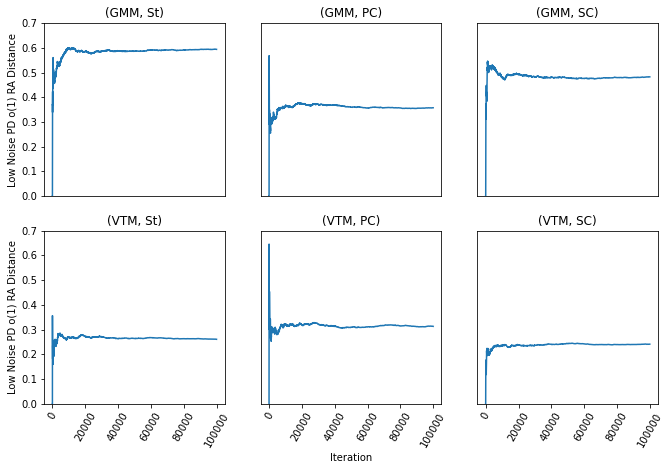

In [21]:
fig_1l, ax_1l = plt.subplots(2,3)

yaxis=np.array([0,0.7])

fig_1l.set_size_inches(11, 7)

ax_1l[0,0].plot(gs1l)
ax_1l[0,0].title.set_text("(GMM, St)")
ax_1l[0,0].set_ylim(yaxis)
ax_1l[0,0].xaxis.set_visible(False)

ax_1l[1,0].plot(s1l)
ax_1l[1,0].title.set_text("(VTM, St)")
ax_1l[1,0].set_ylim(yaxis)

ax_1l[0,1].plot(gp1l)
ax_1l[0,1].title.set_text("(GMM, PC)")
ax_1l[0,1].set_ylim(yaxis)
ax_1l[0,1].xaxis.set_visible(False)
ax_1l[0,1].yaxis.set_visible(False)

ax_1l[1,1].plot(p1l)
ax_1l[1,1].title.set_text("(VTM, PC)")
ax_1l[1,1].set_ylim(yaxis)
ax_1l[1,1].yaxis.set_visible(False)

ax_1l[0,2].plot(gc1l)
ax_1l[0,2].title.set_text("(GMM, SC)")
ax_1l[0,2].set_ylim(yaxis)
ax_1l[0,2].xaxis.set_visible(False)
ax_1l[0,2].yaxis.set_visible(False)

ax_1l[1,2].plot(c1l)
ax_1l[1,2].title.set_text("(VTM, SC)")
ax_1l[1,2].set_ylim(yaxis)
ax_1l[1,2].yaxis.set_visible(False)

ax_1l[1,0].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_1l[1,0].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_1l[1,1].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_1l[1,1].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_1l[1,2].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_1l[1,2].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)

ax_1l[1,1].set_xlabel('Iteration')
ax_1l[0,0].set_ylabel('Low Noise PD o(1) RA Distance')
ax_1l[1,0].set_ylabel('Low Noise PD o(1) RA Distance')

fig.savefig("images/RA_low_o1.jpg",bbox_inches = "tight")


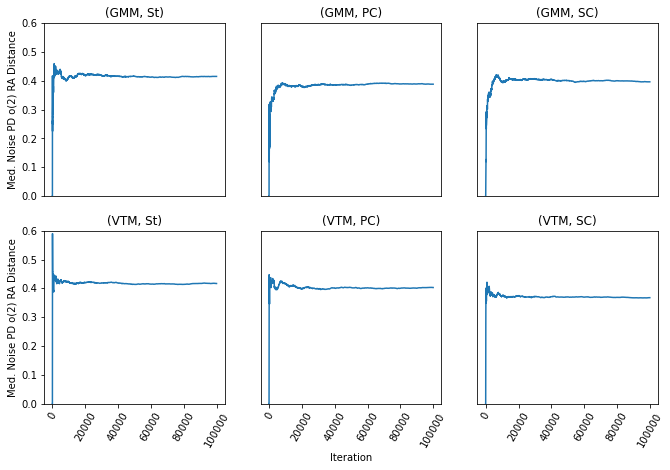

In [22]:
fig_2m, ax_2m = plt.subplots(2,3)

yaxis=np.array([0,0.6])

fig_2m.set_size_inches(11, 7)

ax_2m[0,0].plot(gs2m)
ax_2m[0,0].title.set_text("(GMM, St)")
ax_2m[0,0].set_ylim(yaxis)
ax_2m[0,0].xaxis.set_visible(False)

ax_2m[1,0].plot(s2m)
ax_2m[1,0].title.set_text("(VTM, St)")
ax_2m[1,0].set_ylim(yaxis)

ax_2m[0,1].plot(gp2m)
ax_2m[0,1].title.set_text("(GMM, PC)")
ax_2m[0,1].set_ylim(yaxis)
ax_2m[0,1].xaxis.set_visible(False)
ax_2m[0,1].yaxis.set_visible(False)

ax_2m[1,1].plot(p2m)
ax_2m[1,1].title.set_text("(VTM, PC)")
ax_2m[1,1].set_ylim(yaxis)
ax_2m[1,1].yaxis.set_visible(False)

ax_2m[0,2].plot(gc2m)
ax_2m[0,2].title.set_text("(GMM, SC)")
ax_2m[0,2].set_ylim(yaxis)
ax_2m[0,2].xaxis.set_visible(False)
ax_2m[0,2].yaxis.set_visible(False)

ax_2m[1,2].plot(c2m)
ax_2m[1,2].title.set_text("(VTM, SC)")
ax_2m[1,2].set_ylim(yaxis)
ax_2m[1,2].yaxis.set_visible(False)

ax_2m[1,0].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_2m[1,0].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_2m[1,1].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_2m[1,1].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_2m[1,2].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_2m[1,2].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)

ax_2m[1,1].set_xlabel('Iteration')
ax_2m[0,0].set_ylabel('Med. Noise PD o(2) RA Distance')
ax_2m[1,0].set_ylabel('Med. Noise PD o(2) RA Distance')

fig.savefig("images/RA_med_o2.jpg",bbox_inches = "tight")


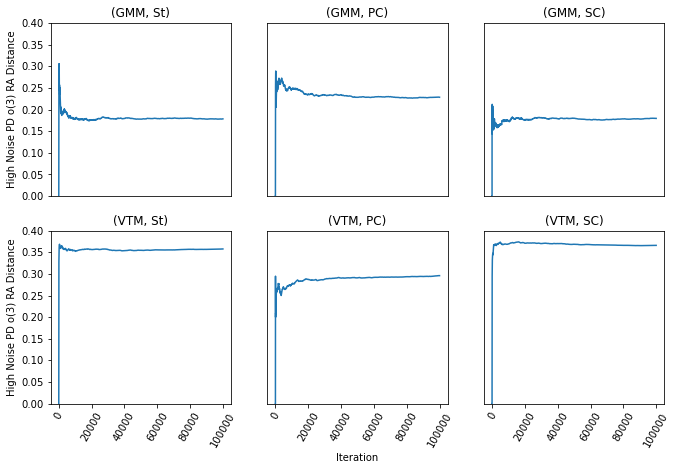

In [23]:
fig_3h, ax_3h = plt.subplots(2,3)

yaxis=np.array([0,0.4])

fig_3h.set_size_inches(11, 7)

ax_3h[0,0].plot(gs3h)
ax_3h[0,0].title.set_text("(GMM, St)")
ax_3h[0,0].set_ylim(yaxis)
ax_3h[0,0].xaxis.set_visible(False)

ax_3h[1,0].plot(s3h)
ax_3h[1,0].title.set_text("(VTM, St)")
ax_3h[1,0].set_ylim(yaxis)

ax_3h[0,1].plot(gp3h)
ax_3h[0,1].title.set_text("(GMM, PC)")
ax_3h[0,1].set_ylim(yaxis)
ax_3h[0,1].xaxis.set_visible(False)
ax_3h[0,1].yaxis.set_visible(False)

ax_3h[1,1].plot(p3h)
ax_3h[1,1].title.set_text("(VTM, PC)")
ax_3h[1,1].set_ylim(yaxis)
ax_3h[1,1].yaxis.set_visible(False)

ax_3h[0,2].plot(gc3h)
ax_3h[0,2].title.set_text("(GMM, SC)")
ax_3h[0,2].set_ylim(yaxis)
ax_3h[0,2].xaxis.set_visible(False)
ax_3h[0,2].yaxis.set_visible(False)

ax_3h[1,2].plot(c3h)
ax_3h[1,2].title.set_text("(VTM, SC)")
ax_3h[1,2].set_ylim(yaxis)
ax_3h[1,2].yaxis.set_visible(False)

ax_3h[1,0].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_3h[1,0].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_3h[1,1].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_3h[1,1].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)
ax_3h[1,2].set_xticks([0, 20000, 40000, 60000, 80000, 100000])
ax_3h[1,2].set_xticklabels([0, 20000, 40000, 60000, 80000, 100000], rotation=60)

ax_3h[1,1].set_xlabel('Iteration')
ax_3h[0,0].set_ylabel('High Noise PD o(3) RA Distance')
ax_3h[1,0].set_ylabel('High Noise PD o(3) RA Distance')

fig.savefig("images/RA_hig_o3.jpg",bbox_inches = "tight")
